In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm         #dataset
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
df.describe()         # Checking for missing values

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [4]:
df["have_affair"] = "Not defined"                           #creating new column to hold binary class values
for i in range(df.affairs.count()):                        
    if df["affairs"][i] == 0:
        df["have_affair"][i] = 0
    else:
        df["have_affair"][i] = 1
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,have_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [5]:
df.drop(columns="affairs",inplace=True)           # Dropping affairs column

In [6]:
df.dtypes                                # checking the datatypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
have_affair         object
dtype: object

In [7]:
df["have_affair"] = df.have_affair.astype(int)               # typecasting the new feature elements since dtype is obj

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

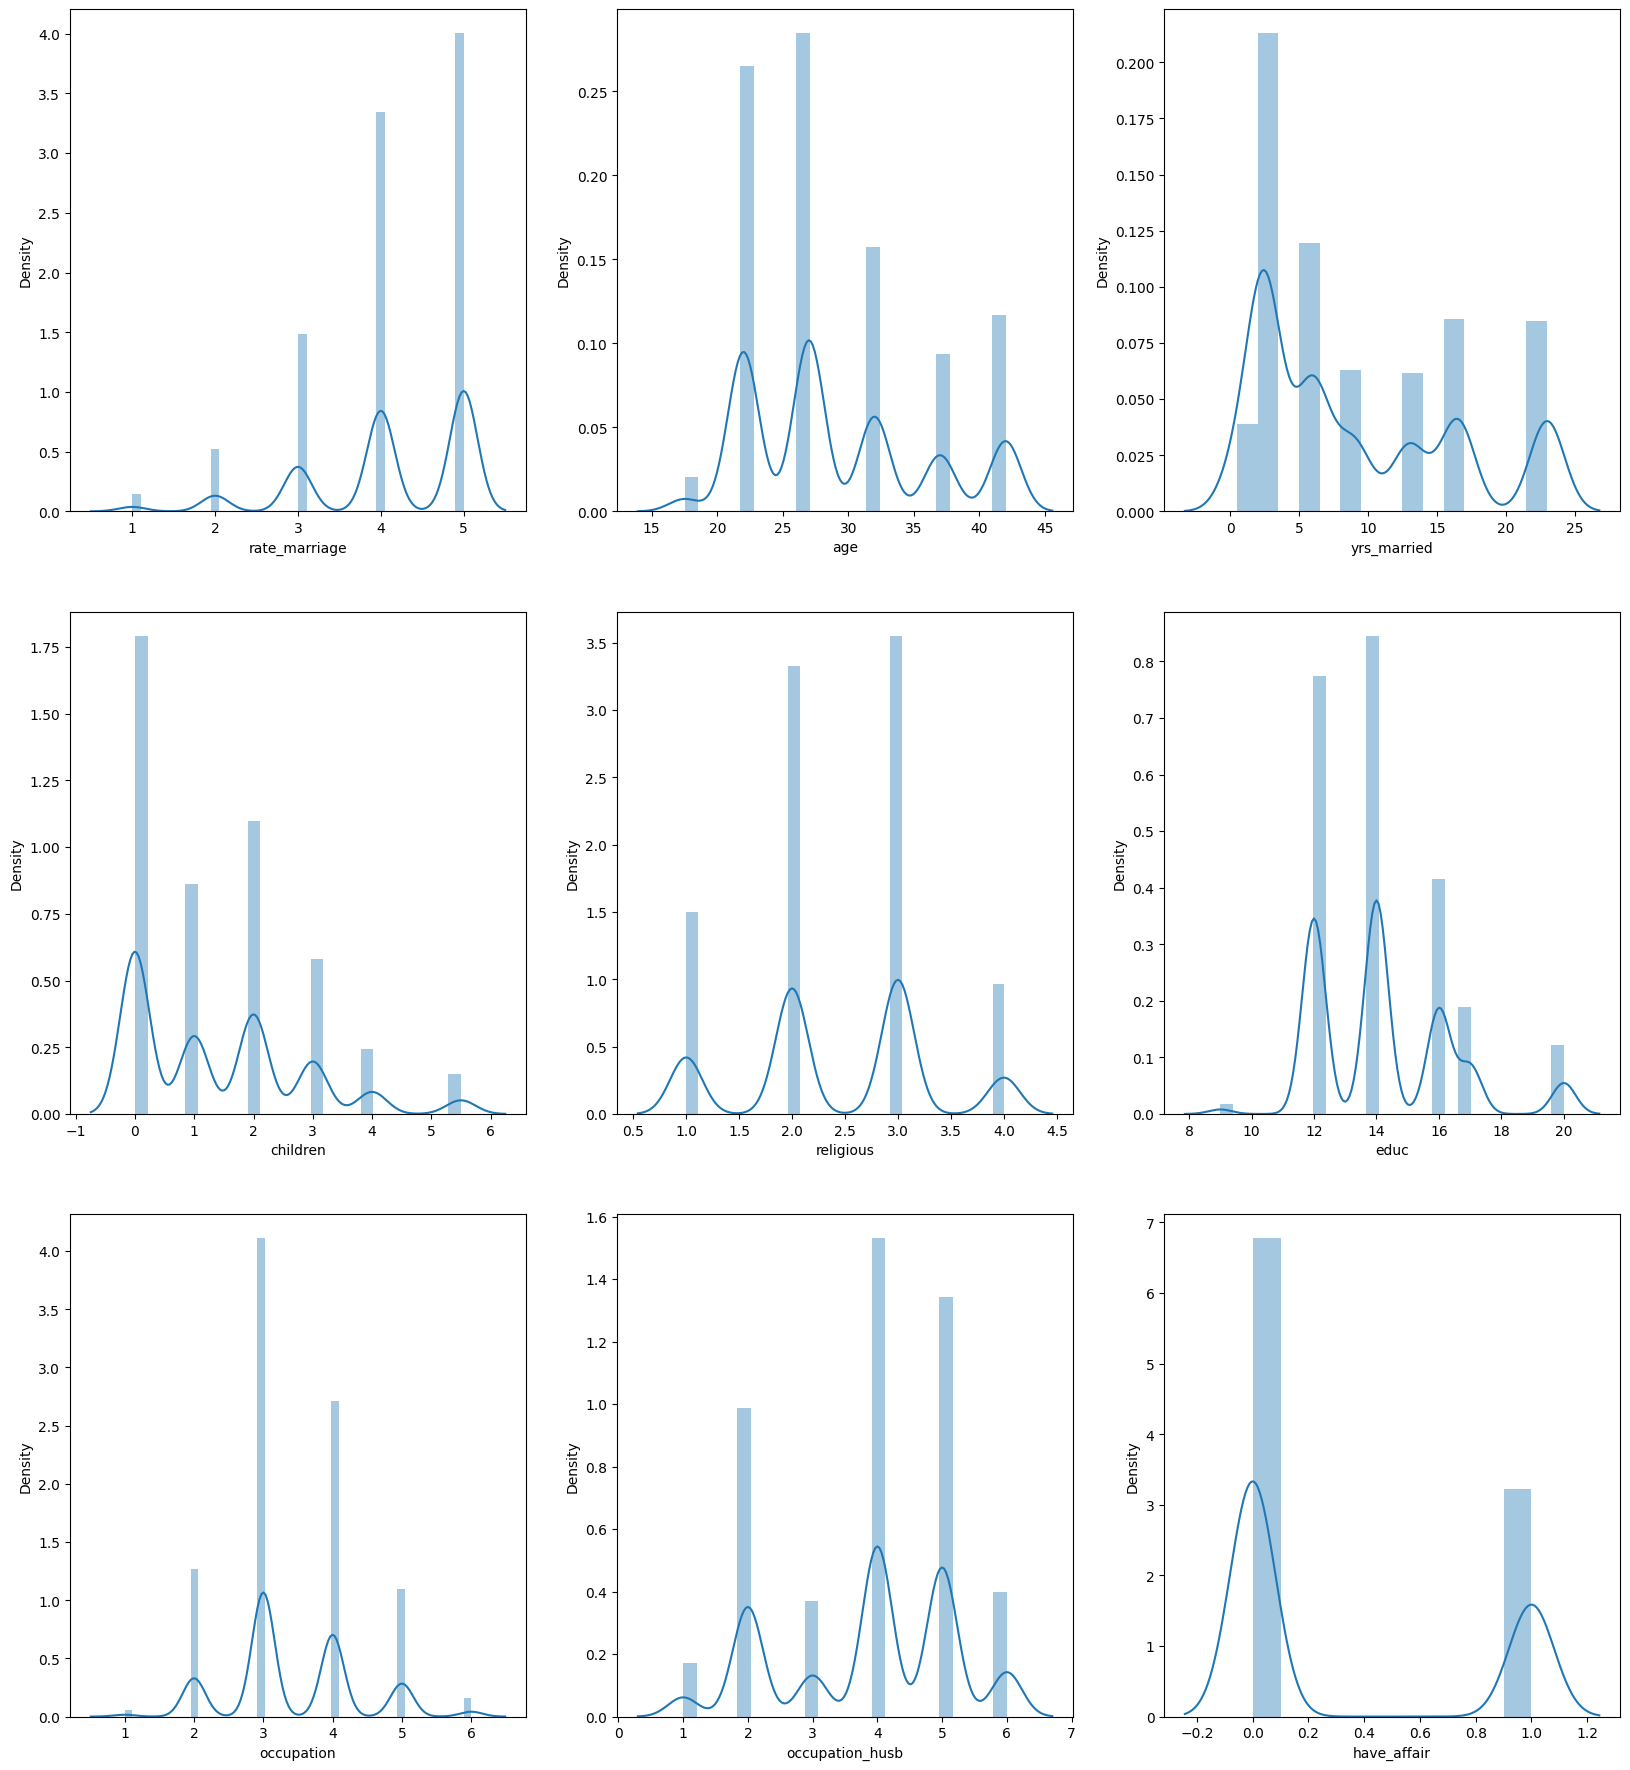

In [8]:
plot_number = 1
plt.figure(figsize=(20,30))
for i in df:                                                   # Scatter plotting
    if plot_number<11:
        plt.subplot(4,3,plot_number)
        sns.distplot(df[i])
        plot_number += 1
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\

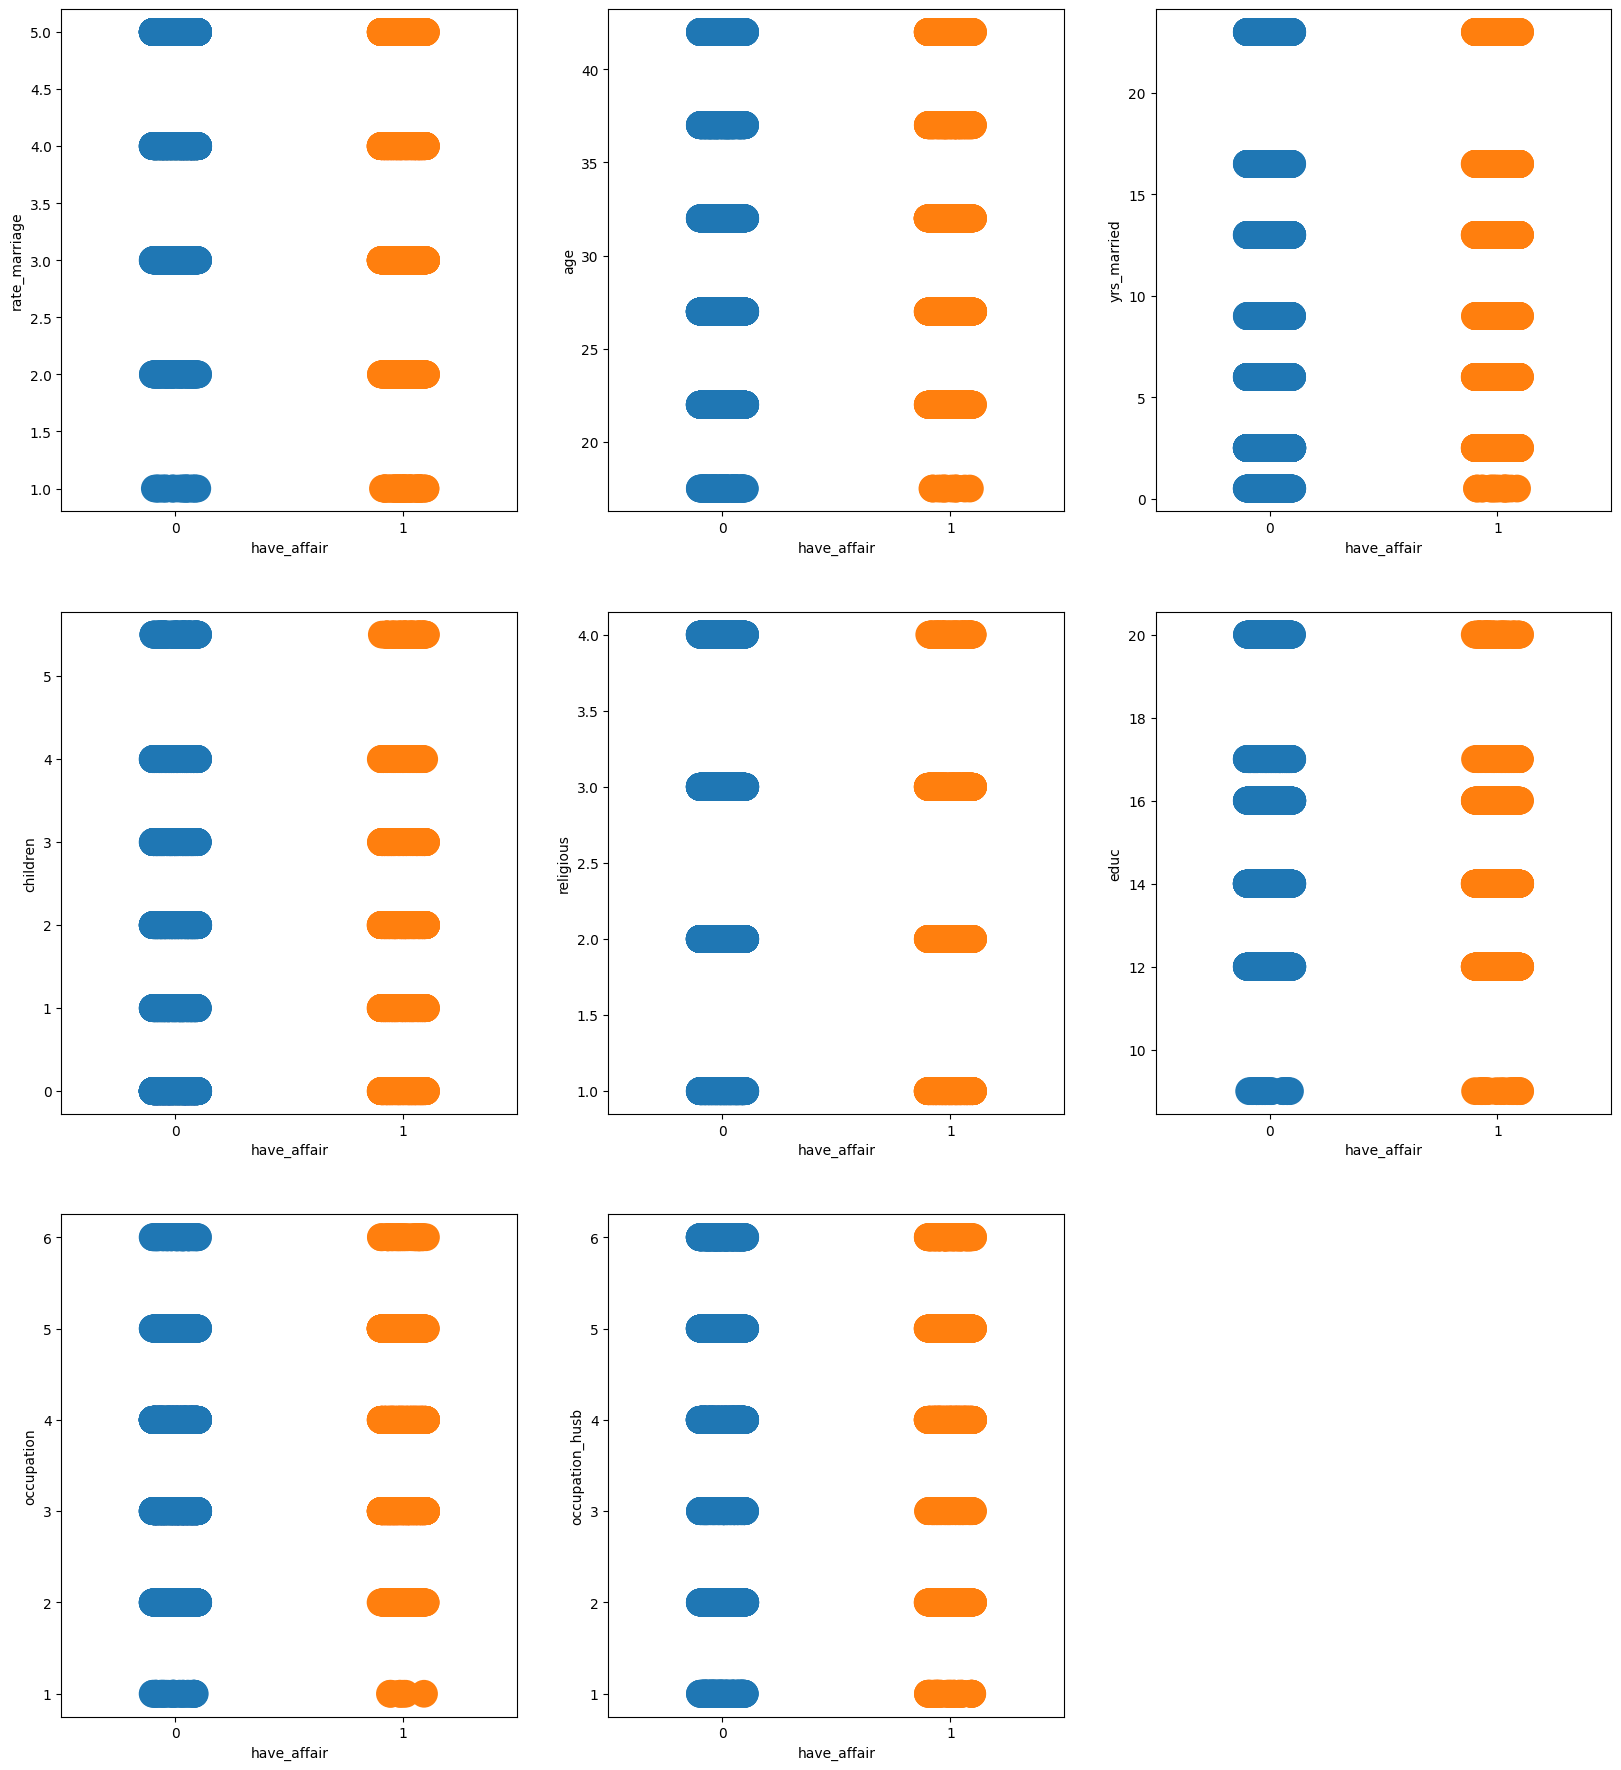

In [9]:
x = df.drop(columns="have_affair")
y = df.have_affair
                                                                             # Strip plotting
plot_number = 1
plt.figure(figsize=(20,30))
for i in x:
    if plot_number<9:
        plt.subplot(4,3,plot_number)
        sns.stripplot(y,x[i],size=20)
        plot_number += 1
plt.show()

In [10]:
# the dataset does not show standard normal distribution
# standardising


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
a = [(variance_inflation_factor(x_scaled,i)) for i in range(x_scaled.shape[1])]
vif = pd.DataFrame(a)
vif["feature"] = x.columns
vif                                             # Showing a huge correlation between "age" and "yrs_married"

,0,feature
0,1.034798,rate_marriage
1,5.454116,age
2,7.142949,yrs_married
3,2.528972,children
4,1.036906,religious
5,1.296242,educ
6,1.206863,occupation
7,1.082876,occupation_husb


In [12]:
df.corr()                                 # "Children" and "Age" are showing considerable correlation with "yrs_married"

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,have_affair
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,0.017637
have_affair,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,1.000000


In [13]:
# Creating a function to evaluate the model



def evaluation(array):
    """Pass the confusion matrix to get the following:-
       Precision,Recall,Accuracy,Precision_Average,Accuracy_Avg,F1_Score
    """
    size = array.shape[0]
    recall,precision = [],[]
    num,accuarcy,rec,pre,avg_pre,avg_rec = 0,0,0,0,0,0
    for i in range(size):
        num = num + array[i][i]
        for j in range(size):
            accuarcy = accuarcy + array[i][j]
            rec = rec+array[i][j]
            pre = pre+array[j][i]
        tru_pos = array[i][i]
        if tru_pos == 0:
            recall.append(0)
            precision.append(0)
        else:
            recall.append(np.round(tru_pos/rec,3))
            precision.append(np.round(tru_pos/pre,3))
            
            avg_pre = avg_pre + np.round(tru_pos/pre,3)
            avg_rec = avg_rec + np.round(tru_pos/rec,3)
        rec,pre = 0,0
    accuarcy = np.round(num/accuarcy,4)*100
    avg_pre = np.round(avg_pre/size,3)
    avg_rec = np.round(avg_rec/size,3)
    return print("precisions--{}\nrecalls are-----{}\n\nAcuuracy = {}%\navg_precision = {}\n"\
                 "avg_recall = {}\nF1_Score = {}"\
                 .format(precision,recall,accuarcy,avg_pre,avg_rec,(2*avg_pre*avg_rec)/(avg_pre+avg_rec)))

## Removing features with high correlation

In [14]:
# Defining x & y
x = df.drop(columns=["have_affair","age","yrs_married"])              #removing yrs_married,age
y = df["have_affair"]

# Standardizing
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [15]:
x.corr()                                  # The correlation is not there when "yrs_married" and "age" are removed

,rate_marriage,children,religious,educ,occupation,occupation_husb
rate_marriage,1.000000,-0.129161,0.078794,0.079869,0.039528,0.027745
children,-0.129161,1.000000,0.141845,-0.141918,-0.015068,0.086660
religious,0.078794,0.141845,1.000000,0.032245,0.035746,0.004061
educ,0.079869,-0.141918,0.032245,1.000000,0.382286,0.183932
occupation,0.039528,-0.015068,0.035746,0.382286,1.000000,0.201156
occupation_husb,0.027745,0.086660,0.004061,0.183932,0.201156,1.000000


In [16]:
# Splitting training and testing data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.20,random_state=20)

#training model
logit = LogisticRegression()
logit.fit(x_train,y_train)

# Score for trained model
print(logit.score(x_train,y_train))

# pedicting y for x_test
y_pred = logit.predict(x_test)

0.7164179104477612


In [17]:
#confusion matrix
c = confusion_matrix(y_test,y_pred)
print(c)

[[802  69]
 [283 120]]


In [18]:
evaluation(c)                    

precisions--[0.739, 0.635]
recalls are-----[0.921, 0.298]

Acuuracy = 72.37%
avg_precision = 0.687
avg_recall = 0.61
F1_Score = 0.6462143407864301


In [19]:
auc = roc_auc_score(y_test,y_pred)
auc

0.6092737306025702

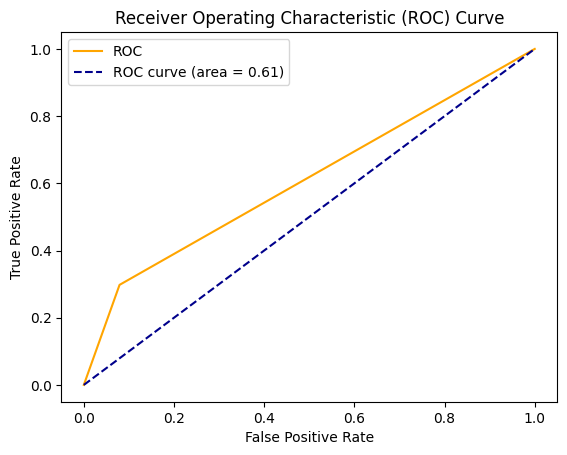

In [20]:
# plotting AUC
fpr,tpr,threshhold = roc_curve(y_test,y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Doing Hyper-para tuning

In [21]:
grid_para = {"penalty":["l1","l2"],
            "random_state":range(32),                              # For hyperpara tuning
            "C":[.1,.5,.8,1]}

In [22]:
grid_search = GridSearchCV(estimator=logit,param_grid=grid_para,cv=5,n_jobs=1)               # Post pruning 
grid_search.fit(x_train,y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this trai

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.1, 0.5, 0.8, 1], 'penalty': ['l1', 'l2'],
                         'random_state': range(0, 32)})

In [23]:
print(grid_search.best_params_)                  #Printing best suitable parameters values 
print(grid_search.best_score_)

{'C': 0.1, 'penalty': 'l2', 'random_state': 0}
0.7156295609355449


In [24]:
# Making model with the best parameters

logit = LogisticRegression(C=0.5,penalty="l2",random_state=0)
logit.fit(x_train,y_train)

print(logit.score(x_train,y_train))

y_pred = logit.predict(x_test)

c = confusion_matrix(y_test,y_pred) # The model is not too much over_fitting the data, 
print("\n"+str(c)+"\n")             #but there is no considerable increase in accuracy, precision, recall and f1_score

print(evaluation(c))

0.7164179104477612

[[802  69]
 [283 120]]

precisions--[0.739, 0.635]
recalls are-----[0.921, 0.298]

Acuuracy = 72.37%
avg_precision = 0.687
avg_recall = 0.61
F1_Score = 0.6462143407864301
None


In [25]:
auc = roc_auc_score(y_test,y_pred)
auc

0.6092737306025702

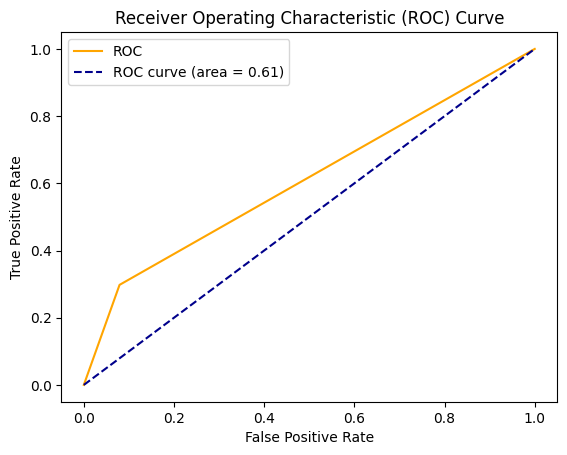

In [26]:
# plotting AUC
fpr,tpr,threshhold = roc_curve(y_test,y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# without droping

In [27]:
# Defining x & y
x = df.drop(columns=["have_affair"])
y = df["have_affair"]

# standardising
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
df_1 = pd.DataFrame(x_scaled,columns=x.columns)

# splitting training and testing data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.20,random_state=20)

# trainig model
logit = LogisticRegression()
logit.fit(x_train,y_train)

# Score for trained model
print(logit.score(x_train,y_train))

# pedicting y for x_test
y_pred = logit.predict(x_test)

0.7205420267085625


In [28]:
# confusion matrix
c = confusion_matrix(y_test,y_pred)
print(c)

[[797  74]
 [276 127]]


In [29]:
                            # The "Scores" are better when no columns are removed
evaluation(c)               # Precision, Accuracy, Recall & F1_Score are all improved                                         

precisions--[0.743, 0.632]
recalls are-----[0.915, 0.315]

Acuuracy = 72.53%
avg_precision = 0.688
avg_recall = 0.615
F1_Score = 0.6494551036070606


In [30]:
auc = roc_auc_score(y_test,y_pred)                     
auc

0.6150883300618495

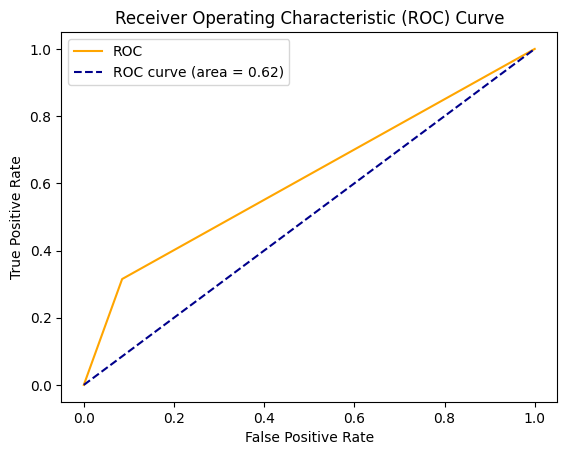

In [31]:
# Plotting AUC
fpr,tpr,threshhold = roc_curve(y_test,y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## The second model, that is the one in which columns (age,yrs_married) are removed with hyper-para tuning, is giving better Accuracy, Precision, Recall, F1_Score & is able to cover more area in the curve("Very small increase only"), than the other 2.